In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from numeric.numeric import Numeric, calc, draw_phase
from PIL import Image

## Tabulation and Interpolation example

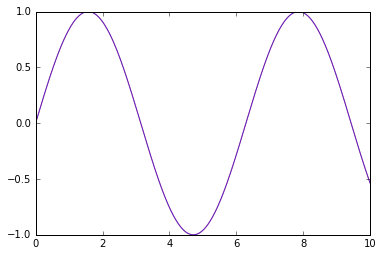

In [4]:
POINTS = 50
STEP = 0.01
START = 0
STOP = 10

num = Numeric()
f = lambda x: np.sin(x)
tabs = num.table(f, START, STOP, POINTS)
f_tabulated = num.interpolate(tabs)

x = list(np.arange(START, STOP, STEP))
plt.plot(x, [f_tabulated(_x) for _x in x],
         color='red', alpha=0.65)
plt.plot(x, [f(_x) for _x in x],
         color='blue', alpha=0.65)
plt.show()

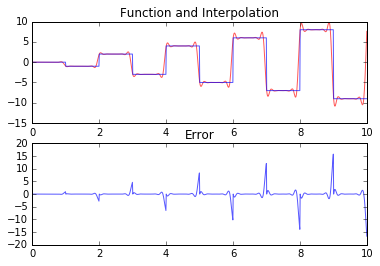

In [5]:
import math

POINTS = 100
STEP = 0.01
START = 0
STOP = 10

num = Numeric()
f = lambda x: math.floor(x) * math.pow(-1, math.floor(x))
tabs = num.table(f, START, STOP, POINTS)
f_tabulated = num.interpolate(tabs)

x = list(np.arange(START, STOP, STEP))

fig = plt.figure()

fs = fig.add_subplot(211)
fs.title.set_text('Function and Interpolation')
fs.plot(x, [f_tabulated(_x) for _x in x],
         color='red', alpha=0.65)
fs.plot(x, [f(_x) for _x in x],
         color='blue', alpha=0.65)

ers = fig.add_subplot(212)
ers.title.set_text('Error')
ers.plot(x, [f(_x) - f_tabulated(_x) for _x in x],
         color='blue', alpha=0.65)

plt.show()

## Derivation and Integration

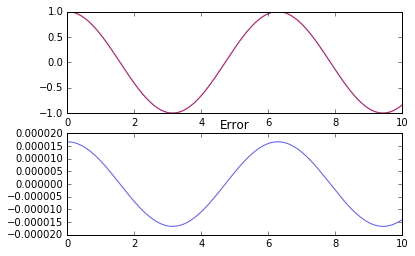

In [6]:
f = lambda x: np.sin(x)
df = lambda x: np.cos(x)
deriv = num.derivative(f)

fig = plt.figure()

dfs = fig.add_subplot(211)
dfs.plot(x, [df(t) for t in x], color='blue', alpha=0.65)
dfs.plot(x, [deriv(t) for t in x], color='red', alpha=0.65)

errs = fig.add_subplot(212)
errs.title.set_text('Error')
errs.plot(x, [df(t) - deriv(t) for t in x], color='blue', alpha=0.65)

plt.show()

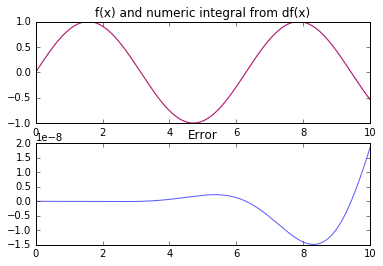

In [7]:
POINTS = 100
integr = num.integral(df, 0, 0, POINTS)

fig = plt.figure()

dfs = fig.add_subplot(211)
dfs.title.set_text('f(x) and numeric integral from df(x)')
dfs.plot(x, [f(t) for t in x], color='blue', alpha=0.65)
dfs.plot(x, [integr(t) for t in x], color='red', alpha=0.65)

errs = fig.add_subplot(212)
errs.title.set_text('Error')
errs.plot(x, [f(t) - integr(t) for t in x], color='blue', alpha=0.65)

plt.show()

## Solve Ax=b

In [8]:
A = np.array(
[[1, 2,  0, 0,  0,  0],
 [3, 2,  4, 0,  0,  0],
 [0, 2,  7, 5,  0,  0],
 [0, 0, -1, 0, -1,  0],
 [0, 0,  0, 3, -5, 12],
 [0, 0,  0, 0,  4,  2]])

y = np.array([0, 2, 7, 1.2, 1.6, -5.])
# 
# a = [0] + [A[i][i - 1] for i in range(1, len(A))]
# b = [A[i][i] for i in range(len(A))]
# c = [A[i][i + 1] for i in range(len(A) - 1)] + [0]
# 
# x = num.tridiag(lambda i: a[i], lambda i: b[i], lambda i: c[i], y)
x = num.linsolve(A, y)

def print_ans(A, x, y):
    print('Matrix:', A, sep='\n')
    print('x:', *['%8.4f' % t for t in x], sep='\n')
    print('A * x:\t', A.dot(x))
    print('Answer:\t', y)

print_ans(A, x, y)

Matrix:
[[ 1  2  0  0  0  0]
 [ 3  2  4  0  0  0]
 [ 0  2  7  5  0  0]
 [ 0  0 -1  0 -1  0]
 [ 0  0  0  3 -5 12]
 [ 0  0  0  0  4  2]]
x:
  1.6780
 -0.8390
 -0.3390
  2.2102
 -0.8610
 -0.7780
A * x:	 [ 0.   2.   7.   1.2  1.6 -5. ]
Answer:	 [ 0.   2.   7.   1.2  1.6 -5. ]


In [9]:
C = np.array([
        [10 ** 6, 2],
        [10 ** 13, 1]
    ])
y = [-71000, 250]
x = num.linsolve(C, y)
print_ans(C, x, y)
print(np.sqrt(sum(t ** 2 for t in (C.dot(x) - y))))

Matrix:
[[       1000000              2]
 [10000000000000              1]]
x:
  0.0000
-35500.0018
A * x:	 [-71000.            249.99992147]
Answer:	 [-71000, 250]
7.85327210906e-05


## Phase portrait and diff equation

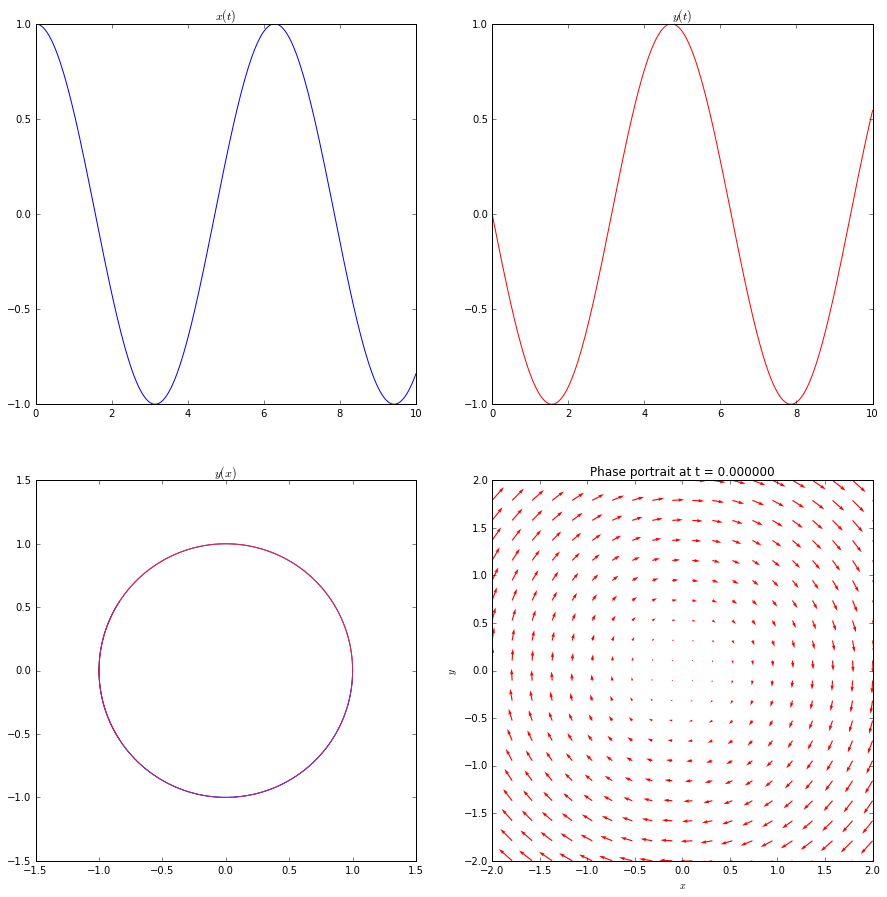

In [42]:
def f(t, x):
    return [x[1], -x[0]]

pts = num.solve_differential(f, [1, 0], 10, 200, lambda y: y)
t = [pt.x for pt in pts]
x = [pt.y[0] for pt in pts]
y = [pt.y[1] for pt in pts]

fig = plt.figure(figsize=(15, 15))

xy = fig.add_subplot(223)
xy.plot(x, y, color='b', alpha=0.65)
xy.plot(np.cos(t), np.sin(t), color='r', alpha=0.55)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
xy.title.set_text('$y(x)$')

xt = fig.add_subplot(221)
xt.plot(t, x, color='b')
xt.title.set_text('$x(t)$')

yt = fig.add_subplot(222)
yt.plot(t, y, color='r')
yt.title.set_text('$y(t)$')

fig.add_subplot(224)
draw_phase(f, 0, -2, 2, -2, 2, 'phase_test.png')